In [1]:
# imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# load the dataset
data = pd.read_csv('creditcard.csv')
# data =data.sample(frac=0.1, random_state=1)

In [3]:
# explore the dataset
print(data.columns)
print(data.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


Dataset contains 30 features and 1 Class label.

* Feature description:  
Time     --> transaction time  
V1 - V28 --> PCA features  
Amount   --> transaction amount  
Class    --> 0 for valid transaction and 1 for fraudulent transaction

In [4]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

As we can see from the output of the above cell, Class mean is very close to 0.  
==> there are lots of normal transactions than that of fraudulent transactions.

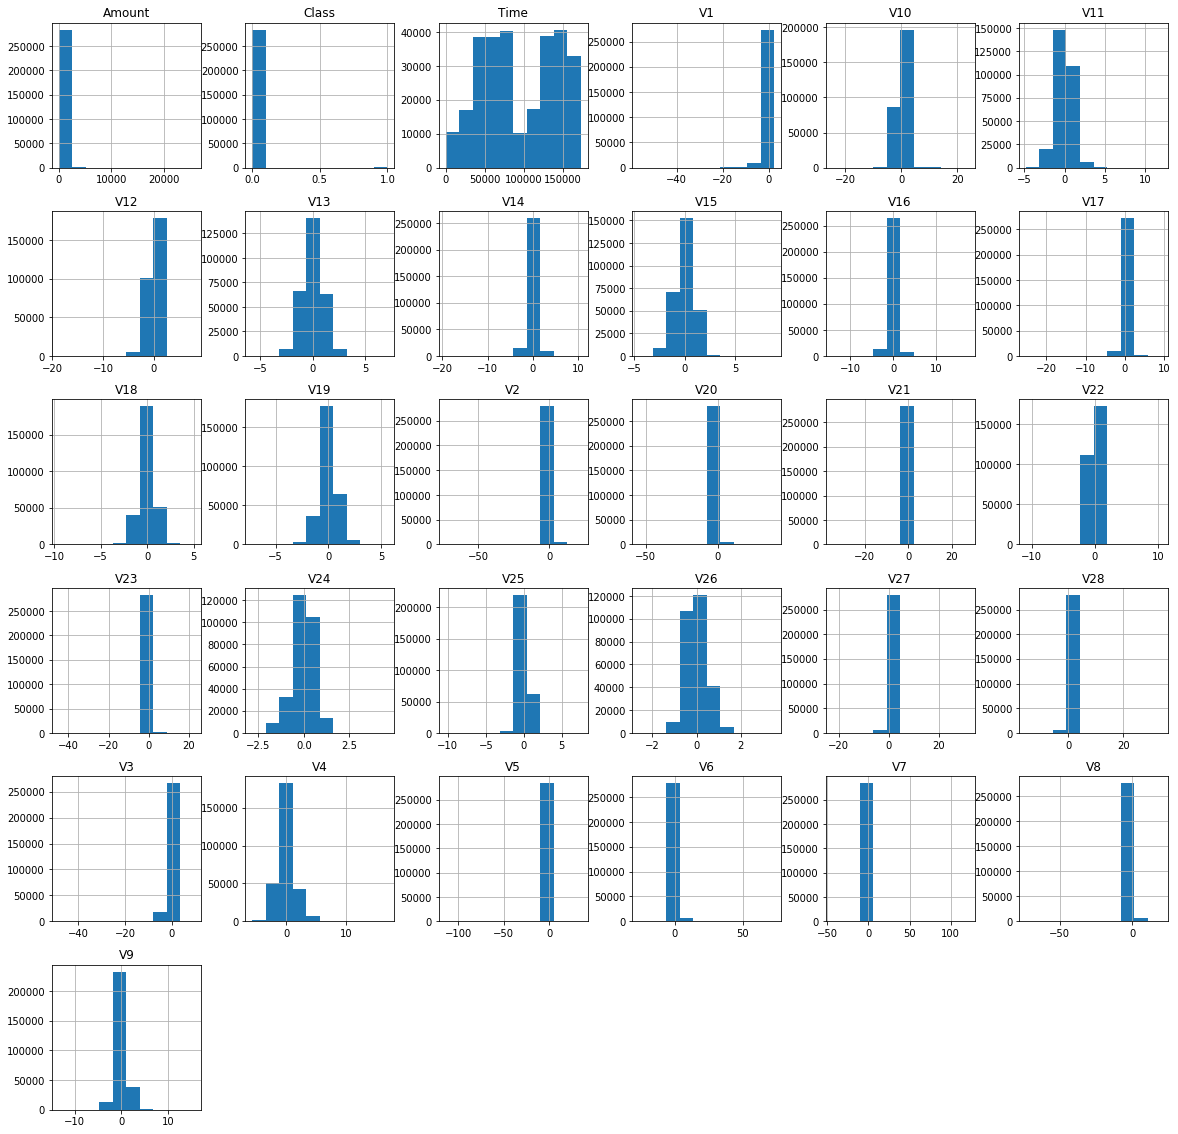

In [5]:
# plot histogram for each parameter
data.hist(figsize=(20, 20))
plt.show()

In [6]:
# determine number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

fraud_fraction = len(fraud)/len(valid)
print('Fraud Fraction: {}'.format(fraud_fraction))

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

Fraud Fraction: 0.0017304750013189597
Fraud cases: 492
Valid cases: 284315


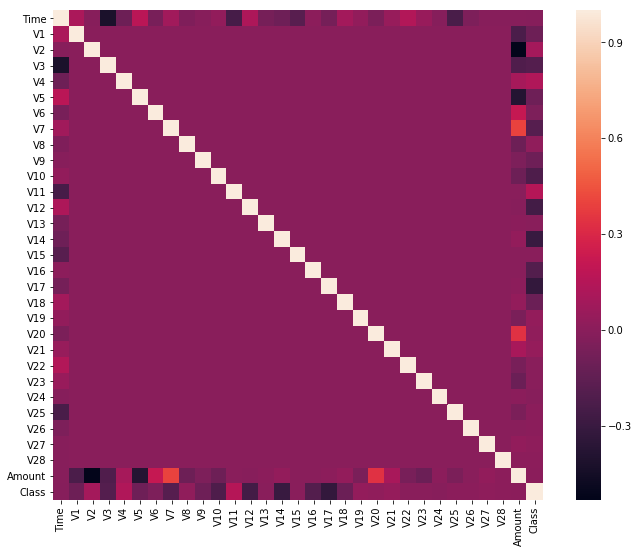

In [7]:
# correlation matrix
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12, 9))

sns.heatmap(correlation_matrix, square=True)
plt.show()

In [8]:
# get the features and targets seprately
features = data.columns.tolist()[:-1]
target = ['Class']

x = data[features]
y = data[target]

print(x.shape)
print(y.shape)

(284807, 30)
(284807, 1)


In [9]:
# import models and metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                        contamination=fraud_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination=fraud_fraction)
}

Isolation Forest: 645 errors
Accuracy: 0.997735308472053
Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.34      0.35      0.35       492

avg / total       1.00      1.00      1.00    284807

Confusion Matrix:



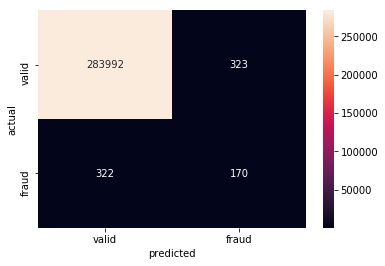

Local Outlier Factor: 935 errors
Accuracy: 0.9967170750718908
Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807

Confusion Matrix:



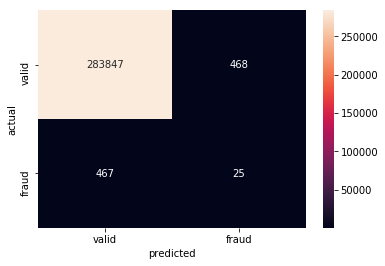

In [10]:
# fit the model
n_outliers = len(fraud)

for (classifier, clf) in classifiers.items():
    if(classifier == "Local Outlier Factor"):
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        y_pred = clf.predict(x)
        scores_pred = clf.decision_function(x)
    
    # the predicted values will be such that 1 is valid and -1 in fraud
    # so we have to change them to 0 and 1 respectively
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    y_pred = y_pred.reshape(-1, 1)
    num_errors = int((y_pred != y).sum())
    confusion_mat = pd.DataFrame(confusion_matrix(y, y_pred),
                                 index=['valid', 'fraud'],
                                 columns=['valid', 'fraud'])
    
    # print classification metrics
    print('{}: {} errors'.format(classifier, num_errors))
    print('Accuracy: {}'.format(accuracy_score(y, y_pred)))
    print('Classification report:\n{}'.format(classification_report(y, y_pred)))
    print('Confusion Matrix:\n')
    sns.heatmap(confusion_mat, annot=True, fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()